# Building a spam classifier using naive bayes

This notebook summarizes a few exercises in Udacity's Machine Learning Using Pytorch Nanodegree program. We use the Naive Bayes algorithm and ensemble methods (bagging, random forest, adaboost) to create a model that can classify dataset SMS messages as spam or not spam, and implement model evaluation metrics (accuracy, precision, recall, F1, F_beta, ROC). The dataset is originally compiled and posted on the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/)

In [13]:
# Import packages and data
import pandas as pd

df = pd.read_table('C:/Users/lucie/Downloads/smsspamcollection/SMSSpamCollection',sep='\t', header=None, names=['label', 'sms_message'])

# Output printing out first 5 rows
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let's convert the label column to binary variables.

In [14]:
df['label'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Split into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


Create a frequency matrix in the sms_message column using the CountVectorizer from scikit-learn.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
X_train = count_vector.fit_transform(X_train)
X_test = count_vector.transform(X_test)

Aside: Alternatively, we can implement Bag of words manually and the use CountVectorize to convert the data into a matrix as follows. We use a small document set as an example.

In [17]:
documents = ['Hello, how are you!', 'Win money, win from home.','Call me now.', 'Hello, Call hello you tomorrow?']

# Convert strings into lower case.
lower_case_documents = []
for i in documents:
    lower_case_documents.append(i.lower())

# Remove punctuations
sans_punctuation_documents = []
import string
for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans('', '', string.punctuation)))

# Tokenize the strings
preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split(' '))

# Count frequencies
frequency_list = []
import pprint
from collections import Counter
for i in preprocessed_documents:
    frequency_counts = Counter(i)
    frequency_list.append(frequency_counts)

count_vector.fit(documents)
doc_array = count_vector.transform(documents).toarray()
frequency_matrix = pd.DataFrame(doc_array)
frequency_matrix

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [18]:
# Implement Naive Bayes using scikit-learn
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

In [19]:
# Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


Now let's try several ensemble methods.

In [20]:
# Import the Bagging, RandomForest, and AdaBoost Classifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)

In [21]:
# Fit and predict with BaggingClassifier
bag_mod.fit(X_train, y_train)
bag_preds = bag_mod.predict(X_test)

# Fit and predict with RandomForestClassifier
rf_mod.fit(X_train, y_train)
rf_preds = bag_mod.predict(X_test)

# Fit and predict with AdaBoostClassifier
ada_mod.fit(X_train, y_train)
ada_preds = bag_mod.predict(X_test)

In [22]:
# Display scores of all four models

def print_metrics(y_true, preds, model_name=None):
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds)))
        print('\n\n')

print_metrics(y_test, y_pred, 'naive bayes')
print_metrics(y_test, bag_preds, 'bagging')
print_metrics(y_test, rf_preds, 'random forest')
print_metrics(y_test, ada_preds, 'adaboost')

Accuracy score for naive bayes : 0.9885139985642498
Precision score naive bayes : 0.9720670391061452
Recall score naive bayes : 0.9405405405405406
F1 score naive bayes : 0.9560439560439562



Accuracy score for bagging : 0.9755922469490309
Precision score bagging : 0.9171270718232044
Recall score bagging : 0.8972972972972973
F1 score bagging : 0.907103825136612



Accuracy score for random forest : 0.9755922469490309
Precision score random forest : 0.9171270718232044
Recall score random forest : 0.8972972972972973
F1 score random forest : 0.907103825136612



Accuracy score for adaboost : 0.9755922469490309
Precision score adaboost : 0.9171270718232044
Recall score adaboost : 0.8972972972972973
F1 score adaboost : 0.907103825136612





In [23]:
# Build function for calculating auc and roc

def build_roc_auc(model, X_train, X_test, y_train, y_test):
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp
    
    y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))  

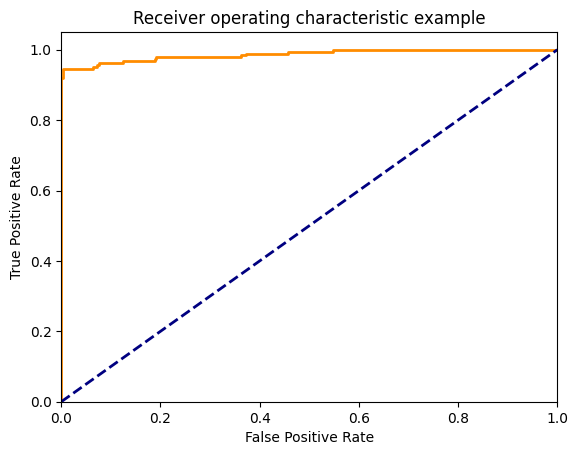

0.9682007338464294

In [26]:
# Finding roc and auc for NB 
build_roc_auc(naive_bayes, X_train, X_test, y_train, y_test)

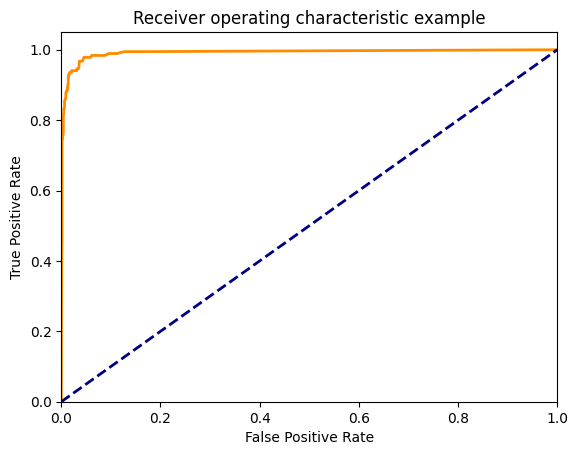

0.9447288347950601

In [27]:
# Finding roc and auc for bagging
build_roc_auc(bag_mod, X_train, X_test, y_train, y_test)

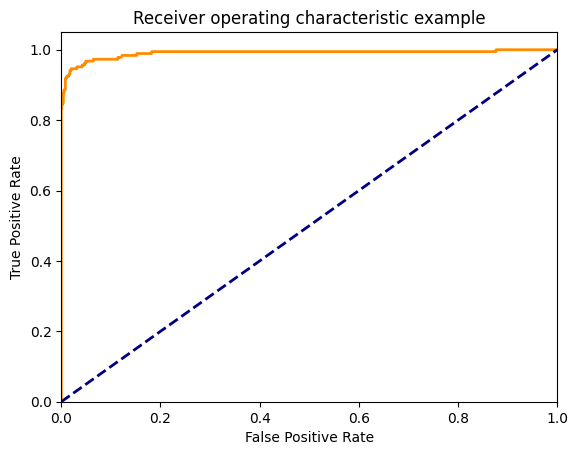

0.9249574906031861

In [28]:
# Finding roc and auc for adaboost
build_roc_auc(ada_mod, X_train, X_test, y_train, y_test)

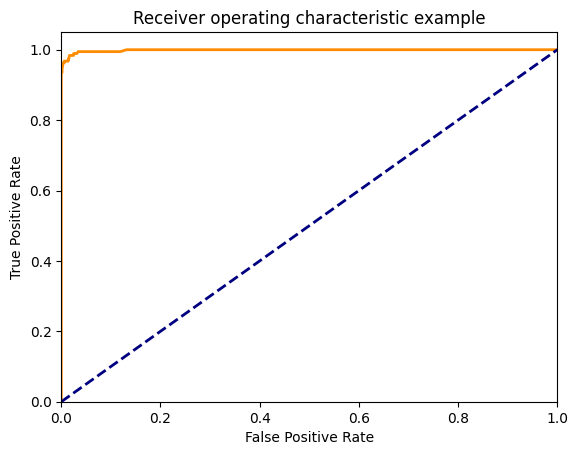

0.9324324324324325

In [24]:
# Finding roc and auc for random forest    
build_roc_auc(rf_mod, X_train, X_test, y_train, y_test)  